# ECDF plots

In [14]:
# uncomment the following:

library('tidyverse')
options(repr.plot.width = 8, repr.plot.height = 3, repr.plot.res = 300)

This cell provides the data 👇.

In [7]:
otter.data = read.csv('https://jcoliver.github.io/learn-r/data/otter-mandible-data.csv') %>%
    gather(characteristic, value, -species, -museum, -accession) %>%
    drop_na() %>%
    group_by(characteristic, species) %>%
    mutate(y_position = rank(value, ties.method = 'first') / length(value)) %>%
    arrange(y_position) %>%
    ungroup()

otter.data %>% head

species,museum,accession,characteristic,value,y_position
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
E. lutris,Burke,50169,m4,14.365,0.01470588
E. lutris,Burke,38680,m1,16.410,0.01492537
E. lutris,Burke,34558,m2,33.160,0.01492537
E. lutris,Burke,34557,m3,21.380,0.01492537
E. lutris,Burke,34557,m5,15.695,0.01492537
E. lutris,Burke,34558,m6,70.430,0.01492537


Make an ECDF plot of `value` and:
- facet by characteristic
- allow the x-axis of each facetted plot to be independent (for the value of the the `scales` argument in `facet_wrap` use `"free_x"`)
- color/group by species  

Species names are typically italicized. Use `theme` and `element_text` to adjust the legend text so that it is italic.

Which otter species has the smallest skull?

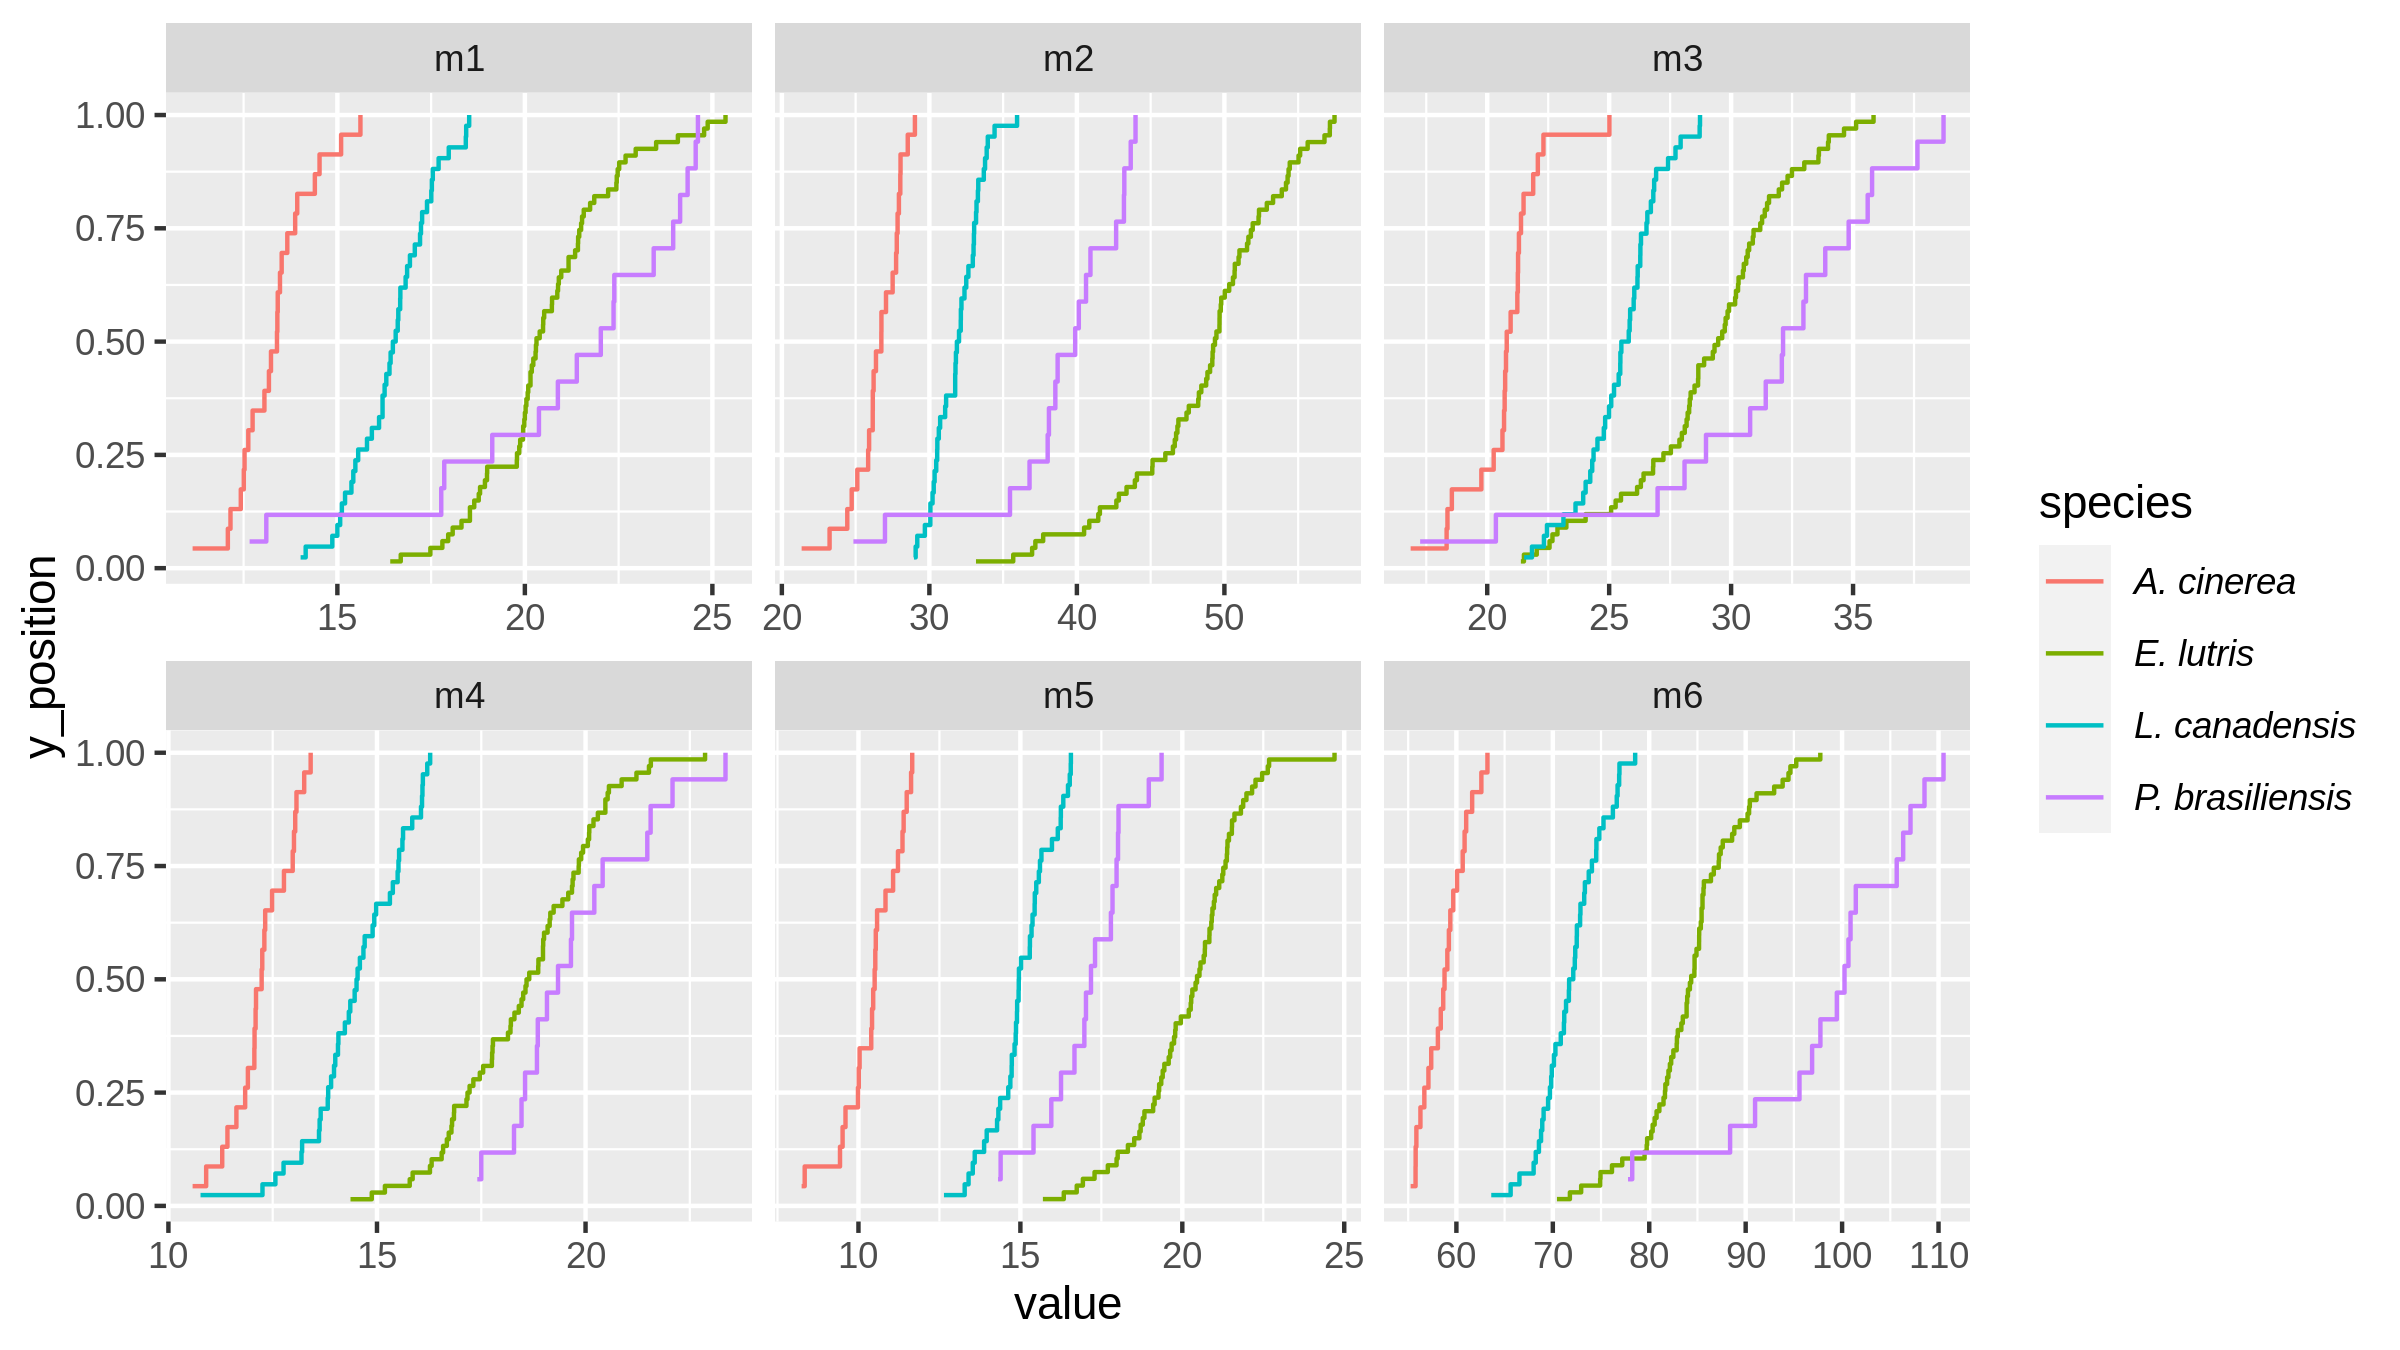

In [23]:
options(repr.plot.width = 8, repr.plot.height = 4.5)

p = ggplot(otter.data, aes(x = value, color = species, y = y_position)) + 
    geom_step() +
    facet_wrap(~characteristic, scales = 'free_x') +
    theme(legend.text = element_text(face = 'italic'))
    scale_color_brewer(palette = 'Dark2')

p

You can uncomment the following line and change the cell type to `markdown` to see what the solution should look like 👇. 

<img src="ecdf_otter_skull.png" />